# 4.3 실습1 - 붓꽃 데이터 회귀

## 4.3.1 문제 정의 및 학습 데이터 준비

In [1]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# 데이터분할
y = df['species']
X = df.drop(['species'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 4.3.2 학습 - 선형회귀 모델

In [3]:
from sklearn.linear_model import LinearRegression

# 학습 모델1 - 선형 회귀 모델 생성
lr_model = LinearRegression()

# 학습 : model.fit(학습용독립변수셋, 학습용종속변수셋)
lr_model.fit(X_train, y_train)
print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-0.11913551 -0.02153593  0.22868436  0.62103641]
bias: 0.15514690208841664


In [4]:
# 평가 : model.score(테스트독립변수셋, 테스트종속변수셋)
score=lr_model.score(X_test, y_test)
score

0.9079660299667303

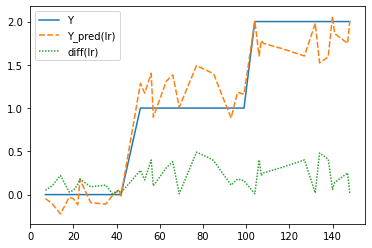

In [5]:
# 예측결과 시각화 ( lineplot )
y_pred = lr_model.predict(X_test)
lr_df=pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred, 'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

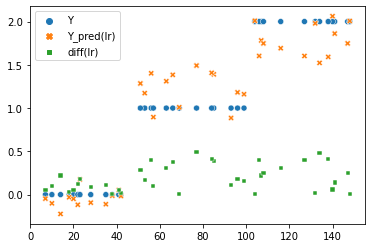

In [6]:
# 예측결과 시각화 ( scatterplot )
sns.scatterplot(data=lr_df)

## 4.3.3 학습 - 의사결정나무 기반의 회귀 알고리즘

In [7]:
from sklearn.tree import DecisionTreeRegressor

# 학습모델2 - DecisionTreeRegressor 객체 생성 및 학습 : model.fit(학습용데이터셋~~~~~)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 평가 : model.score(테스트용 데이터셋~~~~~~)
score = tree_model.score(X_test, y_test)
score

0.839831401475237

In [8]:
# 예측결과 : model.predict(테스트용독립변수셋)
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)})
tree_df.sort_values(by=['diff(tree)'], ascending=False).head(10)
# 실제값(y_test)과 모델결과값(y_pred)의 차이 정렬 및 출력해봄

,Y,Y_pred(tree),diff(tree)
106,2,1.0,1.0
77,1,2.0,1.0
138,2,1.0,1.0
134,2,1.0,1.0
51,1,1.0,0.0
116,2,2.0,0.0
57,1,1.0,0.0
41,0,0.0,0.0
127,2,2.0,0.0
7,0,0.0,0.0


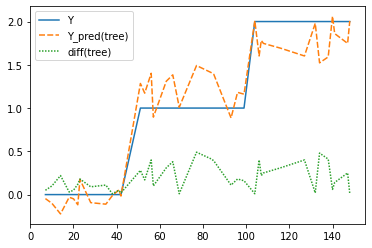

In [9]:
# 예측결과 시각화 : sns.lineplot(data~)
y_pred = lr_model.predict(X_test)
lr_df=pd.DataFrame(data={'Y':y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

In [10]:
# 초기 실행 시 아래 패키지 설치 필요
#!pip install lightgbm
#!pip install xgboost

In [11]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# 3개 앙상블 모델 객체 생성 및 for 문 돌면서 평가 및 R2 Score 도출   

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE, RMSE 도 출력해볼까요. 
# MSE : 모델이 예측한 값과 실제값의 차이 측정 지표 (예측값-실제값)의 제곱의 평균 
# RMSE : MSE를 루트 씌운 값 

In [13]:
# 성능 개선? 